In [ ]:
#pip install statsmodels

In [2]:
%%capture
# Running the previous notebooks
%run TSP.ipynb
%run TSPextended.ipynb
%run LocalSearch.ipynb
%run EvolutionaryAlgorithmTSP.ipynb
%run EvolutionaryAlgorithmFSTSP.ipynb

#Importing their classes
tsp = TSP()
tsp_ext = TSPext()
localsearch = LocalSearch()

KeyboardInterrupt: 

KeyboardInterrupt: 

Importing the relevant packages.
We require the following:

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import qmc
import matplotlib.pyplot as plt
import scipy.stats as stats
import time as time
import sklearn

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [4]:
#Importing the distance dataframe for testing
#Creating the truck distance dataframe, drone distance dataframe with drone speed half of truck speed
#Importing the distance dataframe
columns = [i for i in range(1,26)]
distance_dataframe = pd.read_csv('distance_dataframes/dist_dataframe_normal_1_25_wo:0.csv',names = columns)
distance_dataframe = distance_dataframe.iloc[1:]

truck_multiplier = 1
drone_multiplier = 0.5

#Creating the individual dataframes
truck_time_dataframe, drone_time_dataframe = multiplydistancedataframe(distance_dataframe, truck_multiplier, drone_multiplier)

In [5]:
truck_time_dataframe.head()

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
1,0.00,0.35,0.59,0.30,0.20,0.22,0.49,0.68,0.59,0.50,...,0.24,0.43,0.44,0.84,0.37,0.54,0.27,0.29,0.33,0.16
2,0.35,0.00,0.29,0.08,0.17,0.35,0.22,0.70,0.54,0.32,...,0.53,0.41,0.55,0.60,0.30,0.20,0.21,0.23,0.27,0.21
3,0.59,0.29,0.00,0.30,0.44,0.48,0.40,0.96,0.79,0.54,...,0.80,0.40,0.83,0.73,0.57,0.29,0.34,0.51,0.55,0.42
4,0.30,0.08,0.30,0.00,0.15,0.27,0.29,0.73,0.59,0.38,...,0.50,0.34,0.56,0.68,0.33,0.28,0.14,0.25,0.30,0.14
5,0.20,0.17,0.44,0.15,0.00,0.29,0.30,0.61,0.49,0.33,...,0.36,0.44,0.42,0.66,0.23,0.35,0.22,0.14,0.19,0.13


Before determining optimal parameter values, I want to decide which model to run.
I have choice of selecting:
- Random or heuristic initialization
- With or without elitism
- Recombination operator: FSTSP_OX1Crossover, FSTSP_OX1Crossover_R, FSTSP_OX1Crossover_N
- Mutation operator: Two-Opt Swap, Two-Opt Flip
- The termination condition: maximum number of generations or the duplicate count

I am going to perform this analysis on the single dataset dist_dataframe_normal_1_25_wo:0.csv. 

To start off with, I am going to decide the initialisation operators and elitism condition by performing a two-way ANOVA, where the factors will be initialization type (with levels random and heuristic) and elitism type (with levels on or off).

The chosen measure of success will be the fitness value and time value.

For experiment 1, we will fix the parameters of the model as follows:
- Population size: 100
- Number of parents: 75
- Number of offspring: 100
- Tournmanet size: 3
- Tournamnet probability:0.9
- Mutation probability: 0.10
- Drone endurance: 1
- Inverse truck speed: 1
- Inverse drone speed: 2
For the operators:
- Recombination: order_1_crossover
- Mutation: two_opt_swap

As we will be performing 2-way ANOVA, we need to define our hypothesis:
- H0: There is no significant difference in the mean of datasets across the two variables.
- H1: There is a significant difference in the mean of datasets across the two variables.


Experiment 1: Initialisation, Elitism

In [6]:
#Experiment 1.1
#Initialising the class for initialisation type = 'random' and elitisim = 'false'
ea_one = eaFSTSP_One(100, 25, distance_dataframe, truck_time_dataframe, drone_time_dataframe)

In [ ]:
#Running 30 iterations
number_of_iterations = 30

array_max_starting_fitness_values = []
array_max_ending_fitness_values = []
array_run_time_values = []

for i in range(number_of_iterations):
    #Initialise
    init = ea_one.initialize(1, 1, 1)
    #Obtain starting fitness value from initial population
    maximum_starting_fitness_value = max(init[3])
    run = ea_one.mainLoop(75, 100, 3, 0.90, 0.10, 200)
    #Obtain final fitness value from ending population
    maximum_finishing_fitness_value = np.amax(run[3])
    #Obtain run time
    total_run_time = run[4]
    #Appending the values to the arrays
    array_max_starting_fitness_values.append(maximum_starting_fitness_value)
    array_max_ending_fitness_values.append(maximum_finishing_fitness_value)
    array_run_time_values.append(total_run_time)

In [ ]:
#Creating a dataframe with the values obtained
data = [['Random', 'N', array_max_ending_fitness_values[i], array_run_time_values[i], ((array_max_ending_fitness_values[i]-array_max_starting_fitness_values[i])/array_run_time_values[i])] for i in range(30)]
columns = ['Initialisation Type', 'Elitism(Y/N)', 'Maximum Fitness', 'Time', 'Fitness Change per Time']
df = pd.DataFrame(data, columns=columns)

In [ ]:
df.head()

In [ ]:
#Experiment 1.2: Initialising the class for initialisation type = 'random' and elitisim = 'true'
ea_two = eaFSTSP_One_elitism(100, 25, distance_dataframe, truck_time_dataframe, drone_time_dataframe)

In [ ]:
#Running 30 iterations
number_of_iterations = 30

array_max_starting_fitness_values = []
array_max_ending_fitness_values = []
array_run_time_values = []

for i in range(number_of_iterations):
    #Initialise
    init = ea_two.initialize(1, 1, 1)
    #Obtain starting fitness value from initial population
    maximum_starting_fitness_value = max(init[3])
    run = ea_two.mainLoop(75, 100, 3, 0.90, 0.10, 200)
    #Obtain final fitness value from ending population
    maximum_finishing_fitness_value = np.amax(run[3])
    #Obtain run time
    total_run_time = run[4]
    #Appending the values to the arrays
    array_max_starting_fitness_values.append(maximum_starting_fitness_value)
    array_max_ending_fitness_values.append(maximum_finishing_fitness_value)
    array_run_time_values.append(total_run_time)

In [ ]:
#Creating a dataframe with the values obtained
data = [['Random', 'Y', array_max_ending_fitness_values[i], array_run_time_values[i], ((array_max_ending_fitness_values[i]-array_max_starting_fitness_values[i])/array_run_time_values[i])] for i in range(30)]
columns = ['Initialisation Type', 'Elitism(Y/N)', 'Maximum Fitness', 'Time', 'Fitness Change per Time']
df2 = pd.DataFrame(data, columns=columns)

In [ ]:
#Appending the dataframe onto the previous results dataframe
results_df = pd.concat([df, df2], ignore_index=True)

Experiment 1.3: Initialising the class for initialisation type = 'heuristic' and elitisim = 'false'.

I will need to import the class again as I want to change the time the algorithm starts recording to when it initializes the population 

In [ ]:
class eaFSTSP_Two:
    def __init__(self, population_size, number_of_cities, distance_matrix, truck_distance_matrix, drone_distance_matrix):
        #number_of_parents, number_of_offspring, tournament_size, tournament_probability, mutation_probability
        self.population_size = population_size
        self.number_of_cities = number_of_cities
        self.distance_matrix = distance_matrix
        self.truck_distance_matrix = truck_distance_matrix
        self.drone_distance_matrix = drone_distance_matrix
        self.fstsp = eaFSTSP(self.distance_matrix, self.truck_distance_matrix, self.drone_distance_matrix, self.population_size, self.number_of_cities)
        
    #Initialize and evaluate population
    def initialize(self, drone_endurance, inverse_truck_speed, inverse_drone_speed):
        init_time_initialization = time.time() 
        self.routes, self.allocation, self.population, self.fitness = self.fstsp.heuristic_initialization(drone_endurance, inverse_truck_speed, inverse_drone_speed)
        final_time_initialization = time.time()
        self.initialization_time = final_time_initialization - init_time_initialization
        return(self.routes, self.allocation, self.population, self.fitness)
        
    #Run the loop  
    def mainLoop(self, number_of_parents, number_of_offspring, tournament_size, tournament_probability, mutation_probability, total_generations):
         #We can record time it takes for the loop 
        init_time = time.time() 
        
        generation_number =0
        initial_population = self.population
        initial_allocation = self.allocation
        self.fitness_array = []
        self.duplicates = []
        while(generation_number<total_generations):
            #Select parents
            mating_pool, allocation_pool = self.fstsp.parent_selection_tournament(number_of_parents, self.routes, self.allocation,self.fitness,tournament_size, tournament_probability)
            #Recombination
            offspring_database, offspring_allocation_database = self.fstsp.order_one_crossover(mating_pool, allocation_pool, number_of_offspring)
            #Mutation
            mutated_offspring_df, mutated_allocation_arrays_df = self.fstsp.two_opt_swap(offspring_database, offspring_allocation_database, mutation_probability)
            #Evaluation
            offspring_with_fitness, offspring_allocation = self.fstsp.evaluation(mutated_offspring_df, mutated_allocation_arrays_df)
            offspring_with_fitness.columns = initial_population.columns
            offspring_allocation.columns = initial_allocation.columns
            #Replacement
            next_population, next_allocation = self.fstsp.replacement(self.population, offspring_with_fitness, initial_allocation, offspring_allocation)
            #Preparing for next generation
            self.routes = next_population.drop(next_population.columns[-1], axis=1)
            self.allocation = next_allocation
            self.fitness = next_population.iloc[:, -1].values.tolist()
      
            fitness = next_population['Fitness'].max()
            self.fitness_array.append(fitness)
            
            duplicates_count = next_population.duplicated().sum()
            self.duplicates.append(duplicates_count)
            
            generation_number = generation_number + 1
            
        #Recording the end time
        final_time = time.time()
        
        total_time_loop = final_time - init_time
        total_time = total_time_loop + self.initialization_time
        return(next_population, next_allocation, self.fitness, self.fitness_array, total_time)
        
    def printOptimumFitness(self):
        plt.plot(self.fitness_array, marker='x', linestyle='-')
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.title('Plot of Fitness against Generation Number')
        plt.show()
        
    def printDuplicateCount(self):
        plt.plot(self.duplicates, marker='x', linestyle='-')
        plt.xlabel('Generation')
        plt.ylabel('Duplicate Count')
        plt.title('Plot of Number of Duplicate Individuals against Generation Number')
        plt.show()

In [ ]:
#Initialising the class for initialisation type = 'heuristc' and elitisim = 'false'
ea_heuristic = eaFSTSP_Two(100, 25, distance_dataframe, truck_time_dataframe, drone_time_dataframe)

In [ ]:
#Running 30 iterations
number_of_iterations = 30

array_max_starting_fitness_values = []
array_max_ending_fitness_values = []
array_run_time_values = []

for i in range(number_of_iterations):
    #Initialise
    init = ea_heuristic.initialize(1, 1, 1)
    #Obtain starting fitness value from initial population
    maximum_starting_fitness_value = max(init[3])
    run = ea_heuristic.mainLoop(75, 100, 3, 0.90, 0.10, 200)
    #Obtain final fitness value from ending population
    maximum_finishing_fitness_value = np.amax(run[3])
    #Obtain run time
    total_run_time = run[4]
    #Appending the values to the arrays
    array_max_starting_fitness_values.append(maximum_starting_fitness_value)
    array_max_ending_fitness_values.append(maximum_finishing_fitness_value)
    array_run_time_values.append(total_run_time)

In [ ]:
#Creating a dataframe with the values obtained
data = [['Heuristic', 'N', array_max_ending_fitness_values[i], array_run_time_values[i], ((array_max_ending_fitness_values[i]-array_max_starting_fitness_values[i])/array_run_time_values[i])] for i in range(30)]
columns = ['Initialisation Type', 'Elitism(Y/N)', 'Maximum Fitness', 'Time', 'Fitness Change per Time']
df3 = pd.DataFrame(data, columns=columns)

In [ ]:
#Appending the dataframe onto the previous results dataframe
results_df = pd.concat([results_df, df3], ignore_index=True)

In [ ]:
#Experiment 1.4 
#Initialising the class for initialisation type = 'heuristic' and elitisim = 'true'

In [ ]:
class eaFSTSP_Two_elitism:
    def __init__(self, population_size, number_of_cities, distance_matrix, truck_distance_matrix, drone_distance_matrix):
        #number_of_parents, number_of_offspring, tournament_size, tournament_probability, mutation_probability
        self.population_size = population_size
        self.number_of_cities = number_of_cities
        self.distance_matrix = distance_matrix
        self.truck_distance_matrix = truck_distance_matrix
        self.drone_distance_matrix = drone_distance_matrix
        self.fstsp = eaFSTSP(self.distance_matrix, self.truck_distance_matrix, self.drone_distance_matrix, self.population_size, self.number_of_cities)
        
    #Initialize and evaluate population
    def initialize(self, drone_endurance, inverse_truck_speed, inverse_drone_speed):
        init_time_initialization = time.time() 
        self.routes, self.allocation, self.population, self.fitness = self.fstsp.heuristic_initialization(drone_endurance, inverse_truck_speed, inverse_drone_speed)
        final_time_initialization = time.time()
        self.initialization_time = final_time_initialization - init_time_initialization
        return(self.routes, self.allocation, self.population, self.fitness)
        
    #Run the loop  
    def mainLoop(self, number_of_parents, number_of_offspring, tournament_size, tournament_probability, mutation_probability, total_generations):
        #We can record time it takes for the loop 
        init_time = time.time() 
        
        generation_number =0
        initial_population = self.population
        initial_allocation = self.allocation
        self.fitness_array = []
        self.duplicates = []
        elite_member_index = initial_population['Fitness'].idxmax()
        elite_member = initial_population.iloc[elite_member_index]
        elite_allocation = initial_allocation.iloc[elite_member_index]
        elite_fitness = elite_member['Fitness']
        while(generation_number<total_generations):
            #Select parents
            mating_pool, allocation_pool = self.fstsp.parent_selection_tournament(number_of_parents, self.routes, self.allocation,self.fitness,tournament_size, tournament_probability)
            #Recombination
            offspring_database, offspring_allocation_database = self.fstsp.order_one_crossover(mating_pool, allocation_pool, number_of_offspring)
            #Mutation
            mutated_offspring_df, mutated_allocation_arrays_df = self.fstsp.two_opt_swap(offspring_database, offspring_allocation_database, mutation_probability)
            #Evaluation
            offspring_with_fitness, offspring_allocation = self.fstsp.evaluation(mutated_offspring_df, mutated_allocation_arrays_df)
            offspring_with_fitness.columns = initial_population.columns
            offspring_allocation.columns = initial_allocation.columns
            #Replacement
            next_population, next_allocation = self.fstsp.replacement(self.population, offspring_with_fitness, initial_allocation, offspring_allocation)
            #
            if elite_fitness < next_population['Fitness'].max():
                next_population = next_population
            else:
                minimum_index = next_population['Fitness'].idxmin()
                next_population.loc[minimum_index] = elite_member
                next_allocation.loc[minimum_index] = elite_allocation
            #Preparing for next generation
            self.routes = next_population.drop(next_population.columns[-1], axis=1)
            self.allocation = next_allocation
            self.fitness = next_population.iloc[:, -1].values.tolist()
      
            fitness = next_population['Fitness'].max()
            self.fitness_array.append(fitness)
            
            #
            elite_member_index = next_population['Fitness'].idxmax()
            elite_member = next_population.loc[elite_member_index]
            elite_allocation = next_allocation.loc[elite_member_index]
            elite_fitness = elite_member['Fitness']
            
            #
            duplicates_count = next_population.duplicated().sum()
            self.duplicates.append(duplicates_count)
            
            generation_number = generation_number + 1
        
        #Recording the end time
        final_time = time.time()
        
        total_time_loop = final_time - init_time
        total_time = total_time_loop + self.initialization_time
        
        return(next_population, next_allocation, self.fitness, self.fitness_array, total_time)
        
    def printOptimumFitness(self):
        plt.plot(self.fitness_array, marker='x', linestyle='-')
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.title('Plot of Fitness against Generation Number')
        plt.show()
        
    def printDuplicateCount(self):
        plt.plot(self.duplicates, marker='x', linestyle='-')
        plt.xlabel('Generation')
        plt.ylabel('Duplicate Count')
        plt.title('Plot of Number of Duplicate Individuals against Generation Number')
        plt.show()

In [ ]:
ea_heuristic = eaFSTSP_Two_elitism(100, 25, distance_dataframe, truck_time_dataframe, drone_time_dataframe)

In [ ]:
#Running 30 iterations
number_of_iterations = 30

array_max_starting_fitness_values = []
array_max_ending_fitness_values = []
array_run_time_values = []

for i in range(number_of_iterations):
    #Initialise
    init = ea_heuristic.initialize(1, 1, 1)
    #Obtain starting fitness value from initial population
    maximum_starting_fitness_value = max(init[3])
    run = ea_heuristic.mainLoop(75, 100, 3, 0.90, 0.10, 200)
    #Obtain final fitness value from ending population
    maximum_finishing_fitness_value = np.amax(run[3])
    #Obtain run time
    total_run_time = run[4]
    #Appending the values to the arrays
    array_max_starting_fitness_values.append(maximum_starting_fitness_value)
    array_max_ending_fitness_values.append(maximum_finishing_fitness_value)
    array_run_time_values.append(total_run_time)

In [ ]:
#Creating a dataframe with the values obtained
data = [['Heuristic', 'Y', array_max_ending_fitness_values[i], array_run_time_values[i], ((array_max_ending_fitness_values[i]-array_max_starting_fitness_values[i])/array_run_time_values[i])] for i in range(30)]
columns = ['Initialisation Type', 'Elitism(Y/N)', 'Maximum Fitness', 'Time', 'Fitness Change per Time']
df4 = pd.DataFrame(data, columns=columns)

In [ ]:
#Appending the dataframe onto the previous results dataframe
results_df = pd.concat([results_df, df4], ignore_index=True)

In [ ]:
results_df

In [ ]:
#Saving the dataframe as a csv file
results_df.to_csv('Initialisation-Elitism.csv', index = False)

In order to perform the ANOVA test, we need to determine if the dataset is normally distributed and that variances are equal between the different treatement groups.

We can test for normality using the Shapiro-Wilks test, where $H_0$ will be that the data is normally distributed.

In [10]:
results_df = pd.read_csv('results/Initialisation-Elitism.csv')

In [8]:
#Examining the maximum fitness values
data = results_df['Maximum Fitness']

#Performing the test
statistic = stats.shapiro(data) 

In [9]:
statistic

ShapiroResult(statistic=0.9363813400268555, pvalue=2.460771611367818e-05)

The test suggests that we should reject the null hypothesis, that the data is not normally distributed.

We also need to ensure that the variances are equal between the treatment groups. We can check this using the Bartlett test.

In [20]:
group1 = results_df[(results_df['Initialisation Type'] == 'Random') & (results_df['Elitism(Y/N)'] == 'Y')]
group2 = results_df[(results_df['Initialisation Type'] == 'Random') & (results_df['Elitism(Y/N)'] == 'N')]
group3 = results_df[(results_df['Initialisation Type'] == 'Heuristic') & (results_df['Elitism(Y/N)'] == 'Y')]
group4 = results_df[(results_df['Initialisation Type'] == 'Heuristic') & (results_df['Elitism(Y/N)'] == 'N')]

In [21]:
treatment_group_1 = group1['Maximum Fitness']
treatment_group_2 = group2['Maximum Fitness']
treatment_group_3 = group3['Maximum Fitness']
treatment_group_4 = group4['Maximum Fitness']

In [22]:
# Performing the Bartlett test
statistic, p_value = stats.bartlett(treatment_group_1, treatment_group_2, treatment_group_3, treatment_group_4)

In [23]:
statistic, p_value 

(26.285921073834054, 8.309111589965764e-06)

The test suggests that we should reject the hypothesis that the variance between each group is approximatley equal.

Let us perform some data analysis by plotting some graphs and performing visual inspection.

In [ ]:
data = results_df['Maximum Fitness']
plt.hist(data, bins = 'auto')
plt.xlabel('Fitness')
plt.title('Histogram of Fitness Values for results_df')
plt.savefig('Histogram of Fitness Values for results_df.png')

In [ ]:
random_values = results_df[results_df['Initialisation Type'] == 'Random']
heuristic_values = results_df[results_df['Initialisation Type'] == 'Heuristic']
#Removing outliers
heuristic_values = heuristic_values[heuristic_values['Time'] < 500]

In [ ]:
data_r = random_values['Maximum Fitness']
plt.hist(data_r, bins = 'auto')
plt.xlabel('Fitness')
plt.title('Histogram of Fitness Values for Randomly Generated Solutions')
plt.savefig('Histogram of Fitness Values for Randomly Generated Solutions.png')

In [ ]:
data_h = heuristic_values['Maximum Fitness']
plt.hist(data_h, bins = 'auto')
plt.xlabel('Fitness')
plt.title('Histogram of Fitness Values for Heuristically Generated Solutions')
plt.savefig('Histogram of Fitness Values for Heuristically Generated Solutions.png')

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x= random_values['Time'], y = random_values['Maximum Fitness'], c = 'red', label='Random')
plt.scatter(x= heuristic_values['Time'], y = heuristic_values['Maximum Fitness'], c = 'blue', label='Heuristic')
plt.xlabel('Time')
plt.ylabel('Fitness')
plt.title('Fitness against Time for Solutions in results_df')
plt.savefig('Fitness against Time for Solutions in results_df.png')
plt.legend()

In [ ]:
random_elite = random_values[random_values['Elitism(Y/N)'] == 'Y']
heuristic_elite = heuristic_values[heuristic_values['Elitism(Y/N)'] == 'Y']
random_non_elite = random_values[random_values['Elitism(Y/N)'] == 'N']
heuristic_non_elite = heuristic_values[heuristic_values['Elitism(Y/N)'] == 'N']

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x= random_elite['Time'], y = random_elite['Maximum Fitness'], c = 'red', label='Elitism')
plt.scatter(x= random_non_elite['Time'], y = random_non_elite['Maximum Fitness'], c = 'blue', label='Non-Elitism')
plt.xlabel('Time')
plt.ylabel('Fitness')
plt.title('Fitness against Time for Random Solutions')
plt.savefig('Fitness against Time for Random Solutions.png')
plt.legend()

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x= heuristic_elite['Time'], y = heuristic_elite['Maximum Fitness'], c = 'red', label='Elitism')
plt.scatter(x= heuristic_non_elite['Time'], y = heuristic_non_elite['Maximum Fitness'], c = 'blue', label='Non-Elitism')
plt.xlabel('Time')
plt.ylabel('Fitness')
plt.title('Fitness against Time for Heuristic Solutions')
plt.savefig('Fitness against Time for Heuristic Solutions.png')
plt.legend()

In order to transform the data so that it will be normally distributed and that the variances between the different treatment groups is equal, I can apply the Box-Cox transformations.

First, I need to ensure that the data is positive.

In [24]:
results_df = pd.read_csv('results/Initialisation-Elitism.csv')

In [25]:
results_df['Maximum Fitness'] = results_df['Maximum Fitness'] * -1

In [26]:
#Applying the transformation
transformed_data, lambda_value = stats.boxcox(results_df['Maximum Fitness'])

In [27]:
#Ensuring it is normalized
statistic = stats.shapiro(transformed_data)
statistic 

ShapiroResult(statistic=0.9897106289863586, pvalue=0.508874773979187)

In [28]:
#Creating a new dataframe with the normalized values
results_df['Maximum Fitness'] = transformed_data

In [29]:
normalized_df = results_df 

In [30]:
normalized_df.head()

,Initialisation Type,Elitism(Y/N),Maximum Fitness,Time,Fitness Change per Time
0,Random,N,0.224386,97.184824,0.037866
1,Random,N,0.224438,84.580819,0.043982
2,Random,N,0.224493,80.489574,0.037334
3,Random,N,0.224426,78.958938,0.047936
4,Random,N,0.224475,84.650495,0.044713


Now, we can check if treatment groups satisfy the condition of hmogeneity of variances.

In [31]:
group1 = results_df[(results_df['Initialisation Type'] == 'Random') & (results_df['Elitism(Y/N)'] == 'Y')]
group2 = results_df[(results_df['Initialisation Type'] == 'Random') & (results_df['Elitism(Y/N)'] == 'N')]
group3 = results_df[(results_df['Initialisation Type'] == 'Heuristic') & (results_df['Elitism(Y/N)'] == 'Y')]
group4 = results_df[(results_df['Initialisation Type'] == 'Heuristic') & (results_df['Elitism(Y/N)'] == 'N')]

In [32]:
treatment_group_1 = group1['Maximum Fitness']
treatment_group_2 = group2['Maximum Fitness']
treatment_group_3 = group3['Maximum Fitness']
treatment_group_4 = group4['Maximum Fitness']

In [33]:
# Performing the Bartlett test
statistic, p_value = stats.bartlett(treatment_group_1, treatment_group_2, treatment_group_3, treatment_group_4)

In [34]:
statistic, p_value 

(6.619427002672655, 0.08506973400003477)

We have a very small p-value of 0.085 but it is larger than the typical threshold of 0.05.

In [35]:
#Renaming the columns
normalized_df = normalized_df.rename(columns={'Maximum Fitness': 'Maximum_Fitness', 'Initialisation Type': 'Initialisation_Type'})

In [36]:
normalized_df = normalized_df.rename(columns={'Elitism(Y/N)': 'Elitism'})

Now we can perform the 2-way ANOVA test.

In [37]:
# Perform two-way ANOVA
model = ols('Maximum_Fitness ~ Initialisation_Type + Elitism + Initialisation_Type:Elitism', data=normalized_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

In [38]:
print(anova_table)

                                   sum_sq     df          F        PR(>F)
Initialisation_Type          1.236689e-07    1.0  69.707094  1.667768e-13
Elitism                      1.457836e-08    1.0   8.217220  4.929082e-03
Initialisation_Type:Elitism  4.619461e-09    1.0   2.603800  1.093249e-01
Residual                     2.057982e-07  116.0        NaN           NaN


In [39]:
df = pd.DataFrame(anova_table)

In [41]:
df.to_csv("Initialisation-Elitism Anova Table")

We have the $p-values$ for Initialisation_Type and Elitism < 0.5, which suggests they both have a significant effect on maximum fitness (although the p-score for Initialisation_Type << p-score for Elitism).

One possible post-hoc test we can perform is Tukey's test. This is done using the $pairwise\_tukeyhsd$ function from $statsmodels.stats.multicomp$.

In [ ]:
tukey_result = pairwise_tukeyhsd(normalized_df['Maximum_Fitness'], normalized_df['Initialisation_Type'] + normalized_df['Elitism'], alpha = 0.05)

In [ ]:
tukey_result.plot_simultaneous()
plt.savefig('tukey_result.plot_simultaneous.png')

In [ ]:
tukey_result.summary()

In [ ]:
tukey_summary = pd.DataFrame(tukey_result.summary().data[1:], columns=tukey_result.summary().data[0])

In [ ]:
tukey_summary.to_csv('tukey_summary_heuristic_elitism.csv', index=False)

We are only interested in the results: HeuristicN & HeuristicY, RandomN & RandomY

Let us perform a 2-way ANOVA between initialisation and time. 

In [ ]:
#Ensuring the time data is normalized
statistic = stats.shapiro(normalized_df['Time'])
statistic 

In [ ]:
#Applying the transformation
transformed_data, lambda_value = stats.boxcox(normalized_df['Time'])

In [ ]:
#Ensuring it is normalized
statistic = stats.shapiro(transformed_data)
statistic 

It still fails the null hypothesis. We can try the min-max normalization instead.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
data = normalized_df['Time']
data = np.array(data).reshape(-1,1)

In [ ]:
#Applying the min-max scaler
normalized_time = scaler.fit_transform(data)

In [ ]:
#Ensuring it is normalized
statistic = stats.shapiro(normalized_time)
statistic 

I am unable to transform the time values into a normalized dataset.

Let us perform the ANOVA test anyways and see what we get.

In [ ]:
#Performing ANOVA between Intialisation type and fitness
model = ols('Time ~ Initialisation_Type', data=normalized_df).fit()
anova_table = sm.stats.anova_lm(model)

In [ ]:
anova_table

Performing the Tukey test

In [ ]:
tukey_result = pairwise_tukeyhsd(normalized_df['Time'], normalized_df['Initialisation_Type'], alpha = 0.05)

In [ ]:
print(tukey_result)

In [ ]:
tukey_result.plot_simultaneous()
plt.savefig('tukey_result_2.plot_simultaneous.png')

### Experiment 2: Recombination and Mutation Operators

##### Experiment 2.1
- Initialisation: random_initialization
- Parent Selection: parent_selection_tournament
- Recombination: order_one_crossover
- Mutation: two_opt_swap
- Replacement: generational
- Elitisim: False

We will perform this experiment using the eaFSTSP_One class from the EvolutionaryAlgorithmFSTSP.ipynb file

In [ ]:
ea = eaFSTSP_One(100, 25, distance_dataframe, truck_time_dataframe, drone_time_dataframe)

In [ ]:
#Running 30 iterations
number_of_iterations = 30

array_max_starting_fitness_values = []
array_max_ending_fitness_values = []
array_run_time_values = []

for i in range(number_of_iterations):
    #Initialise
    init = ea.initialize(1, 1, 1)
    #Obtain starting fitness value from initial population
    maximum_starting_fitness_value = max(init[3])
    run = ea.mainLoop(75, 100, 3, 0.90, 0.10, 200)
    #Obtain final fitness value from ending population
    maximum_finishing_fitness_value = np.amax(run[3])
    #Obtain run time
    total_run_time = run[4]
    #Appending the values to the arrays
    array_max_starting_fitness_values.append(maximum_starting_fitness_value)
    array_max_ending_fitness_values.append(maximum_finishing_fitness_value)
    array_run_time_values.append(total_run_time)

In [ ]:
#Creating a dataframe with the values obtained
data = [['OX1', 'Two_Opt_Swap', array_max_ending_fitness_values[i], array_run_time_values[i], ((array_max_ending_fitness_values[i]-array_max_starting_fitness_values[i])/array_run_time_values[i])] for i in range(30)]
columns = ['Crossover Operator', 'Mutation Operator', 'Maximum Fitness', 'Time', 'Fitness Change per Time']
df = pd.DataFrame(data, columns=columns)

In [ ]:
df.to_csv('df1.csv')

##### Experiment 2.2
- Initialisation: random_initialization
- Parent Selection: parent_selection_tournament
- Recombination: order_one_crossover
- Mutation: two_opt_flip
- Replacement: generational
- Elitisim: False

In [ ]:
class eaFSTSP_One_flip:
    def __init__(self, population_size, number_of_cities, distance_matrix, truck_distance_matrix, drone_distance_matrix):
        #number_of_parents, number_of_offspring, tournament_size, tournament_probability, mutation_probability
        self.population_size = population_size
        self.number_of_cities = number_of_cities
        self.distance_matrix = distance_matrix
        self.truck_distance_matrix = truck_distance_matrix
        self.drone_distance_matrix = drone_distance_matrix
        self.fstsp = eaFSTSP(self.distance_matrix, self.truck_distance_matrix, self.drone_distance_matrix, self.population_size, self.number_of_cities)
        
    #Initialize and evaluate population
    def initialize(self, drone_endurance, inverse_truck_speed, inverse_drone_speed):
        self.routes, self.allocation, self.population, self.fitness = self.fstsp.random_initialization(drone_endurance, inverse_truck_speed, inverse_drone_speed)
        return(self.routes, self.allocation, self.population, self.fitness)
        
    #Run the loop  
    def mainLoop(self, number_of_parents, number_of_offspring, tournament_size, tournament_probability, mutation_probability, total_generations):
        #We can record time it takes for the loop 
        init_time = time.time()   
        
        generation_number =0
        initial_population = self.population
        initial_allocation = self.allocation
        self.fitness_array = []
        self.duplicates = []
        while(generation_number<total_generations):
            #Select parents
            mating_pool, allocation_pool = self.fstsp.parent_selection_tournament(number_of_parents, self.routes, self.allocation,self.fitness,tournament_size, tournament_probability)
            #Recombination
            offspring_database, offspring_allocation_database = self.fstsp.order_one_crossover(mating_pool, allocation_pool, number_of_offspring)
            #Mutation
            mutated_offspring_df, mutated_allocation_arrays_df = self.fstsp.two_opt_flip(offspring_database, offspring_allocation_database, mutation_probability)
            #Evaluation
            offspring_with_fitness, offspring_allocation = self.fstsp.evaluation(mutated_offspring_df, mutated_allocation_arrays_df)
            offspring_with_fitness.columns = initial_population.columns
            offspring_allocation.columns = initial_allocation.columns
            #Replacement
            next_population, next_allocation = self.fstsp.replacement(self.population, offspring_with_fitness, initial_allocation, offspring_allocation)
            #Preparing for next generation
            self.routes = next_population.drop(next_population.columns[-1], axis=1)
            self.allocation = next_allocation
            self.fitness = next_population.iloc[:, -1].values.tolist()
      
            fitness = next_population['Fitness'].max()
            self.fitness_array.append(fitness)
            
            duplicates_count = next_population.duplicated().sum()
            self.duplicates.append(duplicates_count)
            
            generation_number = generation_number + 1
        
        #Recording the end time
        final_time = time.time()
        
        total_time = final_time - init_time
        
        return(next_population, next_allocation, self.fitness, self.fitness_array, total_time)
        
    def printOptimumFitness(self):
        plt.plot(self.fitness_array, marker='x', linestyle='-')
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.title('Plot of Fitness against Generation Number')
        plt.savefig('eaFSTSP_One_Fitness_Gen_Plot.png')
        plt.show()
        
    def printDuplicateCount(self):
        plt.plot(self.duplicates, marker='x', linestyle='-')
        plt.xlabel('Generation')
        plt.ylabel('Duplicate Count')
        plt.title('Plot of Number of Duplicate Individuals against Generation Number')
        plt.savefig('eaFSTSP_One_Duplicates_Gen_Plot.png')
        plt.show()

In [ ]:
ea = eaFSTSP_One_flip(100, 25, distance_dataframe, truck_time_dataframe, drone_time_dataframe)

In [ ]:
#Running 30 iterations
number_of_iterations = 30

array_max_starting_fitness_values = []
array_max_ending_fitness_values = []
array_run_time_values = []

for i in range(number_of_iterations):
    #Initialise
    init = ea.initialize(1, 1, 1)
    #Obtain starting fitness value from initial population
    maximum_starting_fitness_value = max(init[3])
    run = ea.mainLoop(75, 100, 3, 0.90, 0.10, 200)
    #Obtain final fitness value from ending population
    maximum_finishing_fitness_value = np.amax(run[3])
    #Obtain run time
    total_run_time = run[4]
    #Appending the values to the arrays
    array_max_starting_fitness_values.append(maximum_starting_fitness_value)
    array_max_ending_fitness_values.append(maximum_finishing_fitness_value)
    array_run_time_values.append(total_run_time)

In [ ]:
#Creating a dataframe with the values obtained
data = [['OX1', 'Two_Opt_Flip', array_max_ending_fitness_values[i], array_run_time_values[i], ((array_max_ending_fitness_values[i]-array_max_starting_fitness_values[i])/array_run_time_values[i])] for i in range(30)]
columns = ['Crossover Operator', 'Mutation Operator', 'Maximum Fitness', 'Time', 'Fitness Change per Time']
df1 = pd.DataFrame(data, columns=columns)

In [ ]:
df1.to_csv('df2.csv')

##### Experiment 2.3
The class $eaFSTSP\_One\_OXR$ runs the EA on the following test case: 
- Initialisation: random initilization
- Parent Selection: parent_selection_tournament
- Recombination: order_one_crossover_r
- Mutation: two_opt_swap
- Replacement: generational
- Elitisim: False

In [ ]:
#Defining the class
class eaFSTSP_One_OXR:
    def __init__(self, population_size, number_of_cities, distance_matrix, truck_distance_matrix, drone_distance_matrix):
        #number_of_parents, number_of_offspring, tournament_size, tournament_probability, mutation_probability
        self.population_size = population_size
        self.number_of_cities = number_of_cities
        self.distance_matrix = distance_matrix
        self.truck_distance_matrix = truck_distance_matrix
        self.drone_distance_matrix = drone_distance_matrix
        self.fstsp = eaFSTSP(self.distance_matrix, self.truck_distance_matrix, self.drone_distance_matrix, self.population_size, self.number_of_cities)
        
    #Initialize and evaluate population
    def initialize(self, drone_endurance, inverse_truck_speed, inverse_drone_speed):
        self.drone_endurance = drone_endurance
        self.routes, self.allocation, self.population, self.fitness = self.fstsp.random_initialization(drone_endurance, inverse_truck_speed, inverse_drone_speed)
        return(self.routes, self.allocation, self.population, self.fitness)
        
    #Run the loop  
    def mainLoop(self, number_of_parents, number_of_offspring, tournament_size, tournament_probability, mutation_probability, total_generations):
        #We can record time it takes for the loop 
        init_time = time.time()   
        
        generation_number =0
        initial_population = self.population
        initial_allocation = self.allocation
        self.fitness_array = []
        self.duplicates = []
        while(generation_number<total_generations):
            #Select parents
            mating_pool, allocation_pool = self.fstsp.parent_selection_tournament(number_of_parents, self.routes, self.allocation,self.fitness,tournament_size, tournament_probability)
            #Recombination
            offspring_database, offspring_allocation_database = self.fstsp.order_one_crossover_r(mating_pool, allocation_pool, number_of_offspring)
            #Mutation
            mutated_offspring_df, mutated_allocation_arrays_df = self.fstsp.two_opt_swap(offspring_database, offspring_allocation_database, mutation_probability)
            #Evaluation
            offspring_with_fitness, offspring_allocation = self.fstsp.evaluation(mutated_offspring_df, mutated_allocation_arrays_df)
            offspring_with_fitness.columns = initial_population.columns
            offspring_allocation.columns = initial_allocation.columns
            #Replacement
            next_population, next_allocation = self.fstsp.replacement(self.population, offspring_with_fitness, initial_allocation, offspring_allocation)
            #Preparing for next generation
            self.routes = next_population.drop(next_population.columns[-1], axis=1)
            self.allocation = next_allocation
            self.fitness = next_population.iloc[:, -1].values.tolist()
      
            fitness = next_population['Fitness'].max()
            self.fitness_array.append(fitness)
            
            duplicates_count = next_population.duplicated().sum()
            self.duplicates.append(duplicates_count)
            
            generation_number = generation_number + 1
        
        #Recording the end time
        final_time = time.time()
        
        total_time = final_time - init_time
        
        return(next_population, next_allocation, self.fitness, self.fitness_array, total_time)
        
    def printOptimumFitness(self):
        plt.plot(self.fitness_array, marker='x', linestyle='-')
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.title('Plot of Fitness against Generation Number')
        plt.show()
        
    def printDuplicateCount(self):
        plt.plot(self.duplicates, marker='x', linestyle='-')
        plt.xlabel('Generation')
        plt.ylabel('Duplicate Count')
        plt.title('Plot of Number of Duplicate Individuals against Generation Number')
        plt.show()

In [ ]:
ea = eaFSTSP_One_OXR(100, 25, distance_dataframe, truck_time_dataframe, drone_time_dataframe)

In [ ]:
#Running 30 iterations
number_of_iterations = 30

array_max_starting_fitness_values = []
array_max_ending_fitness_values = []
array_run_time_values = []

for i in range(number_of_iterations):
    #Initialise
    init = ea.initialize(1, 1, 1)
    #Obtain starting fitness value from initial population
    maximum_starting_fitness_value = max(init[3])
    run = ea.mainLoop(75, 100, 3, 0.90, 0.10, 200)
    #Obtain final fitness value from ending population
    maximum_finishing_fitness_value = np.amax(run[3])
    #Obtain run time
    total_run_time = run[4]
    #Appending the values to the arrays
    array_max_starting_fitness_values.append(maximum_starting_fitness_value)
    array_max_ending_fitness_values.append(maximum_finishing_fitness_value)
    array_run_time_values.append(total_run_time)

In [ ]:
#Creating a dataframe with the values obtained
data = [['OXR', 'Two_Opt_Swap', array_max_ending_fitness_values[i], array_run_time_values[i], ((array_max_ending_fitness_values[i]-array_max_starting_fitness_values[i])/array_run_time_values[i])] for i in range(30)]
columns = ['Crossover Operator', 'Mutation Operator', 'Maximum Fitness', 'Time', 'Fitness Change per Time']
df2 = pd.DataFrame(data, columns=columns)

In [ ]:
df2.to_csv('df3.csv')

##### Experiment 2.4
The class $eaFSTSP\_One\_OXR\_flip$ runs the EA on the following test case: 
- Initialisation: random initilization
- Parent Selection: parent_selection_tournament
- Recombination: order_one_crossover_r
- Mutation: two_opt_flip
- Replacement: generational
- Elitisim: False

In [ ]:
#Defining the class
class eaFSTSP_One_OXR_flip:
    def __init__(self, population_size, number_of_cities, distance_matrix, truck_distance_matrix, drone_distance_matrix):
        #number_of_parents, number_of_offspring, tournament_size, tournament_probability, mutation_probability
        self.population_size = population_size
        self.number_of_cities = number_of_cities
        self.distance_matrix = distance_matrix
        self.truck_distance_matrix = truck_distance_matrix
        self.drone_distance_matrix = drone_distance_matrix
        self.fstsp = eaFSTSP(self.distance_matrix, self.truck_distance_matrix, self.drone_distance_matrix, self.population_size, self.number_of_cities)
        
    #Initialize and evaluate population
    def initialize(self, drone_endurance, inverse_truck_speed, inverse_drone_speed):
        self.drone_endurance = drone_endurance
        self.routes, self.allocation, self.population, self.fitness = self.fstsp.random_initialization(drone_endurance, inverse_truck_speed, inverse_drone_speed)
        return(self.routes, self.allocation, self.population, self.fitness)
        
    #Run the loop  
    def mainLoop(self, number_of_parents, number_of_offspring, tournament_size, tournament_probability, mutation_probability, total_generations):
        #We can record time it takes for the loop 
        init_time = time.time()   
        
        generation_number =0
        initial_population = self.population
        initial_allocation = self.allocation
        self.fitness_array = []
        self.duplicates = []
        while(generation_number<total_generations):
            #Select parents
            mating_pool, allocation_pool = self.fstsp.parent_selection_tournament(number_of_parents, self.routes, self.allocation,self.fitness,tournament_size, tournament_probability)
            #Recombination
            offspring_database, offspring_allocation_database = self.fstsp.order_one_crossover_r(mating_pool, allocation_pool, number_of_offspring)
            #Mutation
            mutated_offspring_df, mutated_allocation_arrays_df = self.fstsp.two_opt_flip(offspring_database, offspring_allocation_database, mutation_probability)
            #Evaluation
            offspring_with_fitness, offspring_allocation = self.fstsp.evaluation(mutated_offspring_df, mutated_allocation_arrays_df)
            offspring_with_fitness.columns = initial_population.columns
            offspring_allocation.columns = initial_allocation.columns
            #Replacement
            next_population, next_allocation = self.fstsp.replacement(self.population, offspring_with_fitness, initial_allocation, offspring_allocation)
            #Preparing for next generation
            self.routes = next_population.drop(next_population.columns[-1], axis=1)
            self.allocation = next_allocation
            self.fitness = next_population.iloc[:, -1].values.tolist()
      
            fitness = next_population['Fitness'].max()
            self.fitness_array.append(fitness)
            
            duplicates_count = next_population.duplicated().sum()
            self.duplicates.append(duplicates_count)
            
            generation_number = generation_number + 1
        
        #Recording the end time
        final_time = time.time()
        
        total_time = final_time - init_time
        
        return(next_population, next_allocation, self.fitness, self.fitness_array, total_time)
        
    def printOptimumFitness(self):
        plt.plot(self.fitness_array, marker='x', linestyle='-')
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.title('Plot of Fitness against Generation Number')
        plt.show()
        
    def printDuplicateCount(self):
        plt.plot(self.duplicates, marker='x', linestyle='-')
        plt.xlabel('Generation')
        plt.ylabel('Duplicate Count')
        plt.title('Plot of Number of Duplicate Individuals against Generation Number')
        plt.show()

In [ ]:
ea = eaFSTSP_One_OXR_flip(100, 25, distance_dataframe, truck_time_dataframe, drone_time_dataframe)

In [ ]:
#Running 30 iterations
number_of_iterations = 30

array_max_starting_fitness_values = []
array_max_ending_fitness_values = []
array_run_time_values = []

for i in range(number_of_iterations):
    #Initialise
    init = ea.initialize(1, 1, 1)
    #Obtain starting fitness value from initial population
    maximum_starting_fitness_value = max(init[3])
    run = ea.mainLoop(75, 100, 3, 0.90, 0.10, 200)
    #Obtain final fitness value from ending population
    maximum_finishing_fitness_value = np.amax(run[3])
    #Obtain run time
    total_run_time = run[4]
    #Appending the values to the arrays
    array_max_starting_fitness_values.append(maximum_starting_fitness_value)
    array_max_ending_fitness_values.append(maximum_finishing_fitness_value)
    array_run_time_values.append(total_run_time)

In [ ]:
#Creating a dataframe with the values obtained
data = [['OXR', 'Two_Opt_Flip', array_max_ending_fitness_values[i], array_run_time_values[i], ((array_max_ending_fitness_values[i]-array_max_starting_fitness_values[i])/array_run_time_values[i])] for i in range(30)]
columns = ['Crossover Operator', 'Mutation Operator', 'Maximum Fitness', 'Time', 'Fitness Change per Time']
df3 = pd.DataFrame(data, columns=columns)

In [ ]:
df3.to_csv('df4.csv')

##### Experiment 2.5
The class $eaFSTSP\_One\_OXC$ runs the EA on the following test case: 
- Initialisation: random initilization
- Parent Selection: parent_selection_tournament
- Recombination: order_one_crossover_c
- Mutation: two_opt_swap
- Replacement: generational
- Elitisim: False

In [ ]:
#Defining the class
class eaFSTSP_One_OXC:
    def __init__(self, population_size, number_of_cities, distance_matrix, truck_distance_matrix, drone_distance_matrix):
        #number_of_parents, number_of_offspring, tournament_size, tournament_probability, mutation_probability
        self.population_size = population_size
        self.number_of_cities = number_of_cities
        self.distance_matrix = distance_matrix
        self.truck_distance_matrix = truck_distance_matrix
        self.drone_distance_matrix = drone_distance_matrix
        self.fstsp = eaFSTSP(self.distance_matrix, self.truck_distance_matrix, self.drone_distance_matrix, self.population_size, self.number_of_cities)
        
    #Initialize and evaluate population
    def initialize(self, drone_endurance, inverse_truck_speed, inverse_drone_speed):
        self.drone_endurance = drone_endurance
        self.routes, self.allocation, self.population, self.fitness = self.fstsp.random_initialization(drone_endurance, inverse_truck_speed, inverse_drone_speed)
        return(self.routes, self.allocation, self.population, self.fitness)
        
    #Run the loop  
    def mainLoop(self, number_of_parents, number_of_offspring, tournament_size, tournament_probability, mutation_probability, total_generations):
        #We can record time it takes for the loop 
        init_time = time.time()   
        
        generation_number =0
        initial_population = self.population
        initial_allocation = self.allocation
        self.fitness_array = []
        self.duplicates = []
        while(generation_number<total_generations):
            #Select parents
            mating_pool, allocation_pool = self.fstsp.parent_selection_tournament(number_of_parents, self.routes, self.allocation,self.fitness,tournament_size, tournament_probability)
            #Recombination
            offspring_database, offspring_allocation_database = self.fstsp.order_one_crossover_c(mating_pool, allocation_pool, number_of_offspring)
            #Mutation
            mutated_offspring_df, mutated_allocation_arrays_df = self.fstsp.two_opt_swap(offspring_database, offspring_allocation_database, mutation_probability)
            #Evaluation
            offspring_with_fitness, offspring_allocation = self.fstsp.evaluation(mutated_offspring_df, mutated_allocation_arrays_df)
            offspring_with_fitness.columns = initial_population.columns
            offspring_allocation.columns = initial_allocation.columns
            #Replacement
            next_population, next_allocation = self.fstsp.replacement(self.population, offspring_with_fitness, initial_allocation, offspring_allocation)
            #Preparing for next generation
            self.routes = next_population.drop(next_population.columns[-1], axis=1)
            self.allocation = next_allocation
            self.fitness = next_population.iloc[:, -1].values.tolist()
      
            fitness = next_population['Fitness'].max()
            self.fitness_array.append(fitness)
            
            duplicates_count = next_population.duplicated().sum()
            self.duplicates.append(duplicates_count)
            
            generation_number = generation_number + 1
        
        #Recording the end time
        final_time = time.time()
        
        total_time = final_time - init_time
        
        return(next_population, next_allocation, self.fitness, self.fitness_array, total_time)
        
    def printOptimumFitness(self):
        plt.plot(self.fitness_array, marker='x', linestyle='-')
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.title('Plot of Fitness against Generation Number')
        plt.show()
        
    def printDuplicateCount(self):
        plt.plot(self.duplicates, marker='x', linestyle='-')
        plt.xlabel('Generation')
        plt.ylabel('Duplicate Count')
        plt.title('Plot of Number of Duplicate Individuals against Generation Number')
        plt.show()

In [ ]:
ea = eaFSTSP_One_OXC(100, 25, distance_dataframe, truck_time_dataframe, drone_time_dataframe)

In [ ]:
#Running 30 iterations
number_of_iterations = 30

array_max_starting_fitness_values = []
array_max_ending_fitness_values = []
array_run_time_values = []

for i in range(number_of_iterations):
    #Initialise
    init = ea.initialize(1, 1, 1)
    #Obtain starting fitness value from initial population
    maximum_starting_fitness_value = max(init[3])
    run = ea.mainLoop(75, 100, 3, 0.90, 0.10, 200)
    #Obtain final fitness value from ending population
    maximum_finishing_fitness_value = np.amax(run[3])
    #Obtain run time
    total_run_time = run[4]
    #Appending the values to the arrays
    array_max_starting_fitness_values.append(maximum_starting_fitness_value)
    array_max_ending_fitness_values.append(maximum_finishing_fitness_value)
    array_run_time_values.append(total_run_time)

In [ ]:
#Creating a dataframe with the values obtained
data = [['OXC', 'Two_Opt_Swap', array_max_ending_fitness_values[i], array_run_time_values[i], ((array_max_ending_fitness_values[i]-array_max_starting_fitness_values[i])/array_run_time_values[i])] for i in range(30)]
columns = ['Crossover Operator', 'Mutation Operator', 'Maximum Fitness', 'Time', 'Fitness Change per Time']
df4 = pd.DataFrame(data, columns=columns)

In [ ]:
df4.to_csv('df5.csv')

##### Experiment 2.6
The class $eaFSTSP\_One\_OXC\_flip$ runs the EA on the following test case: 
- Initialisation: random initilization
- Parent Selection: parent_selection_tournament
- Recombination: order_one_crossover_C
- Mutation: two_opt_flip
- Replacement: generational
- Elitisim: False

In [ ]:
#Defining the class
class eaFSTSP_One_OXC_flip:
    def __init__(self, population_size, number_of_cities, distance_matrix, truck_distance_matrix, drone_distance_matrix):
        #number_of_parents, number_of_offspring, tournament_size, tournament_probability, mutation_probability
        self.population_size = population_size
        self.number_of_cities = number_of_cities
        self.distance_matrix = distance_matrix
        self.truck_distance_matrix = truck_distance_matrix
        self.drone_distance_matrix = drone_distance_matrix
        self.fstsp = eaFSTSP(self.distance_matrix, self.truck_distance_matrix, self.drone_distance_matrix, self.population_size, self.number_of_cities)
        
    #Initialize and evaluate population
    def initialize(self, drone_endurance, inverse_truck_speed, inverse_drone_speed):
        self.drone_endurance = drone_endurance
        self.routes, self.allocation, self.population, self.fitness = self.fstsp.random_initialization(drone_endurance, inverse_truck_speed, inverse_drone_speed)
        return(self.routes, self.allocation, self.population, self.fitness)
        
    #Run the loop  
    def mainLoop(self, number_of_parents, number_of_offspring, tournament_size, tournament_probability, mutation_probability, total_generations):
        #We can record time it takes for the loop 
        init_time = time.time()   
        
        generation_number =0
        initial_population = self.population
        initial_allocation = self.allocation
        self.fitness_array = []
        self.duplicates = []
        while(generation_number<total_generations):
            #Select parents
            mating_pool, allocation_pool = self.fstsp.parent_selection_tournament(number_of_parents, self.routes, self.allocation,self.fitness,tournament_size, tournament_probability)
            #Recombination
            offspring_database, offspring_allocation_database = self.fstsp.order_one_crossover_c(mating_pool, allocation_pool, number_of_offspring)
            #Mutation
            mutated_offspring_df, mutated_allocation_arrays_df = self.fstsp.two_opt_flip(offspring_database, offspring_allocation_database, mutation_probability)
            #Evaluation
            offspring_with_fitness, offspring_allocation = self.fstsp.evaluation(mutated_offspring_df, mutated_allocation_arrays_df)
            offspring_with_fitness.columns = initial_population.columns
            offspring_allocation.columns = initial_allocation.columns
            #Replacement
            next_population, next_allocation = self.fstsp.replacement(self.population, offspring_with_fitness, initial_allocation, offspring_allocation)
            #Preparing for next generation
            self.routes = next_population.drop(next_population.columns[-1], axis=1)
            self.allocation = next_allocation
            self.fitness = next_population.iloc[:, -1].values.tolist()
      
            fitness = next_population['Fitness'].max()
            self.fitness_array.append(fitness)
            
            duplicates_count = next_population.duplicated().sum()
            self.duplicates.append(duplicates_count)
            
            generation_number = generation_number + 1
        
        #Recording the end time
        final_time = time.time()
        
        total_time = final_time - init_time
        
        return(next_population, next_allocation, self.fitness, self.fitness_array, total_time)
        
    def printOptimumFitness(self):
        plt.plot(self.fitness_array, marker='x', linestyle='-')
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.title('Plot of Fitness against Generation Number')
        plt.show()
        
    def printDuplicateCount(self):
        plt.plot(self.duplicates, marker='x', linestyle='-')
        plt.xlabel('Generation')
        plt.ylabel('Duplicate Count')
        plt.title('Plot of Number of Duplicate Individuals against Generation Number')
        plt.show()

In [ ]:
ea = eaFSTSP_One_OXC_flip(100, 25, distance_dataframe, truck_time_dataframe, drone_time_dataframe)

In [ ]:
#Running 30 iterations
number_of_iterations = 30

array_max_starting_fitness_values = []
array_max_ending_fitness_values = []
array_run_time_values = []

for i in range(number_of_iterations):
    #Initialise
    init = ea.initialize(1, 1, 1)
    #Obtain starting fitness value from initial population
    maximum_starting_fitness_value = max(init[3])
    run = ea.mainLoop(75, 100, 3, 0.90, 0.10, 200)
    #Obtain final fitness value from ending population
    maximum_finishing_fitness_value = np.amax(run[3])
    #Obtain run time
    total_run_time = run[4]
    #Appending the values to the arrays
    array_max_starting_fitness_values.append(maximum_starting_fitness_value)
    array_max_ending_fitness_values.append(maximum_finishing_fitness_value)
    array_run_time_values.append(total_run_time)

In [ ]:
#Creating a dataframe with the values obtained
data = [['OXC', 'Two_Opt_Flip', array_max_ending_fitness_values[i], array_run_time_values[i], ((array_max_ending_fitness_values[i]-array_max_starting_fitness_values[i])/array_run_time_values[i])] for i in range(30)]
columns = ['Crossover Operator', 'Mutation Operator', 'Maximum Fitness', 'Time', 'Fitness Change per Time']
df5 = pd.DataFrame(data, columns=columns)

In [ ]:
df5.to_csv('df6.csv')

In [ ]:
#Reading the csv files
df1 = pd.read_csv('results/df1.csv', index_col= 'Unnamed: 0')
df2 = pd.read_csv('results/df2.csv', index_col= 'Unnamed: 0')
df3 = pd.read_csv('results/df3.csv', index_col= 'Unnamed: 0')
df4 = pd.read_csv('results/df4.csv', index_col= 'Unnamed: 0')
df5 = pd.read_csv('results/df5.csv', index_col= 'Unnamed: 0')
df6 = pd.read_csv('results/df6.csv', index_col= 'Unnamed: 0')

In [ ]:
df_result = pd.concat([df1, df2, df3, df4, df5, df6])
df_result = df_result.reset_index(drop=True)

In [ ]:
df_result.to_csv('Crossover-Mutation.csv', index=False)

In [42]:
df_result = pd.read_csv('results/Crossover-Mutation.csv')

In [48]:
df_result.loc[155:160]

,Crossover Operator,Mutation Operator,Maximum Fitness,Time,Fitness Change per Time
155,OXC,Two_Opt_Flip,-4.395,70.160710,0.065991
156,OXC,Two_Opt_Flip,-5.180,78.219211,0.049157
157,OXC,Two_Opt_Flip,-4.305,77.717615,0.062148
158,OXC,Two_Opt_Flip,-4.670,72.465934,0.052507
159,OXC,Two_Opt_Flip,-5.175,72.432979,0.050529
160,OXC,Two_Opt_Flip,-4.565,79.221966,0.058948


Let us now perform a 2-way ANOVA to determine the effect of both the crossover operator and mutation operator on the fitness score.

In [49]:
#Examining the maximum fitness values
data = df_result['Maximum Fitness']

#Performing the test
statistic = stats.shapiro(data) 

In [50]:
statistic

ShapiroResult(statistic=0.9828833937644958, pvalue=0.026425588876008987)

In [51]:
#Normalizing using the Box-Cox transform
#Multiplying by -1
df_result['Maximum Fitness'] = df_result['Maximum Fitness'] *-1
#Applying the transformation
transformed_data, lambda_value = stats.boxcox(df_result['Maximum Fitness'])

In [52]:
#Performing the test for normality
statistic = stats.shapiro(transformed_data)

In [53]:
statistic

ShapiroResult(statistic=0.9937640428543091, pvalue=0.6460399627685547)

In [54]:
#Replacing the original column in the df
df_result['Maximum Fitness'] = transformed_data

In [ ]:
#Let us check if the condition of homogenity of variance between the different groups is satisfied

We also need to ensure that the variances are equal between the treatment groups. We can check this using the Bartlett test.

In [ ]:
group1 = df_result[(df_result['Crossover Operator'] == 'OX1') & (df_result['Mutation Operator'] == 'Two_Opt_Swap')]
group2 = df_result[(df_result['Crossover Operator'] == 'OXR') & (df_result['Mutation Operator'] == 'Two_Opt_Swap')]
group3 = df_result[(df_result['Crossover Operator'] == 'OXC') & (df_result['Mutation Operator'] == 'Two_Opt_Swap')]
group4 = df_result[(df_result['Crossover Operator'] == 'OX1') & (df_result['Mutation Operator'] == 'Two_Opt_Flip')]
group5 = df_result[(df_result['Crossover Operator'] == 'OXR') & (df_result['Mutation Operator'] == 'Two_Opt_Flip')]
group6 = df_result[(df_result['Crossover Operator'] == 'OXC') & (df_result['Mutation Operator'] == 'Two_Opt_Flip')]

In [ ]:
treatment_group_1 = group1['Maximum Fitness']
treatment_group_2 = group2['Maximum Fitness']
treatment_group_3 = group3['Maximum Fitness']
treatment_group_4 = group4['Maximum Fitness']
treatment_group_5 = group5['Maximum Fitness']
treatment_group_6 = group6['Maximum Fitness']

In [ ]:
# Performing the Bartlett test
statistic, p_value = stats.bartlett(treatment_group_1, treatment_group_2, treatment_group_3, treatment_group_4, treatment_group_5, treatment_group_6)

In [ ]:
statistic, p_value 

In [55]:
#Renaming the columns
df_result = df_result.rename(columns={'Maximum Fitness': 'Maximum_Fitness', 'Mutation Operator': 'Mutation_Operator'})

In [56]:
df_result = df_result.rename(columns={'Crossover Operator': 'Crossover_Operator'})

In [57]:
df_result

,Crossover_Operator,Mutation_Operator,Maximum_Fitness,Time,Fitness Change per Time
0,OX1,Two_Opt_Swap,0.627353,110.886059,0.028408
1,OX1,Two_Opt_Swap,0.622399,110.520432,0.031533
2,OX1,Two_Opt_Swap,0.628493,107.648233,0.031073
3,OX1,Two_Opt_Swap,0.609781,107.973416,0.032138
4,OX1,Two_Opt_Swap,0.618006,112.294837,0.040919
...,...,...,...,...,...
175,OXC,Two_Opt_Flip,0.613680,89.532722,0.048977
176,OXC,Two_Opt_Flip,0.608360,83.626768,0.054289
177,OXC,Two_Opt_Flip,0.617369,95.321822,0.042697
178,OXC,Two_Opt_Flip,0.604397,81.966325,0.050692


Now we can perform the 2-way ANOVA test.

In [58]:
# Perform two-way ANOVA
model = ols('Maximum_Fitness ~ Crossover_Operator + Mutation_Operator + Crossover_Operator:Mutation_Operator', data=df_result).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

In [59]:
print(anova_table)

                                        sum_sq     df          F    PR(>F)
Crossover_Operator                    0.000375    2.0   4.497069  0.012467
Mutation_Operator                     0.000475    1.0  11.388571  0.000911
Crossover_Operator:Mutation_Operator  0.000063    2.0   0.751701  0.473089
Residual                              0.007264  174.0        NaN       NaN


Interestingly, the crossover operator has a p-value of 0.012 >0.05 (which suggests it is not signficiant) and the mutation operator has a value of 0.0009 <0.05 (which suggests it is signficant).

Let us perform Tukey's test.

In [ ]:
tukey_result = pairwise_tukeyhsd(df_result['Maximum_Fitness'], df_result['Crossover_Operator'] + df_result['Mutation_Operator'], alpha = 0.05)

In [ ]:
tukey_result.summary()

In [ ]:
tukey_result.plot_simultaneous()
plt.savefig('tukey_result_3.plot_simultaneous.png')

In [ ]:
arr = np.array([[  0.97707741,   0.56024652, 155.07996157,  68.52450962,
          2.01036721,   0.8968387 ,   0.75986328, 237.40585883]])

In [ ]:
arr[0, [2,3,4,7]] = np.round(arr[0, [2,3,4,7]])
arr

####  Creating the box-and-whiskers plots

In [5]:
df = pd.read_csv('results/Initialisation-Elitism.csv')

In [6]:
df

,Initialisation Type,Elitism(Y/N),Maximum Fitness,Time,Fitness Change per Time
0,Random,N,-4.635,97.184824,0.037866
1,Random,N,-4.895,84.580819,0.043982
2,Random,N,-5.285,80.489574,0.037334
3,Random,N,-4.830,78.958938,0.047936
4,Random,N,-5.140,84.650495,0.044713
...,...,...,...,...,...
115,Heuristic,Y,-4.420,291.350976,0.002694
116,Heuristic,Y,-4.635,306.329279,0.000163
117,Heuristic,Y,-4.345,286.507059,0.002548
118,Heuristic,Y,-4.440,299.759898,0.002335


In [10]:
data1 = df[(df['Initialisation Type'] == 'Random') & (df['Elitism(Y/N)'] == 'N')]['Maximum Fitness']
data2 = df[(df['Initialisation Type'] == 'Random') & (df['Elitism(Y/N)'] == 'Y')]['Maximum Fitness']
data3 = df[(df['Initialisation Type'] == 'Heuristic') & (df['Elitism(Y/N)'] == 'N')]['Maximum Fitness']
data4 = df[(df['Initialisation Type'] == 'Heuristic') & (df['Elitism(Y/N)'] == 'Y')]['Maximum Fitness']

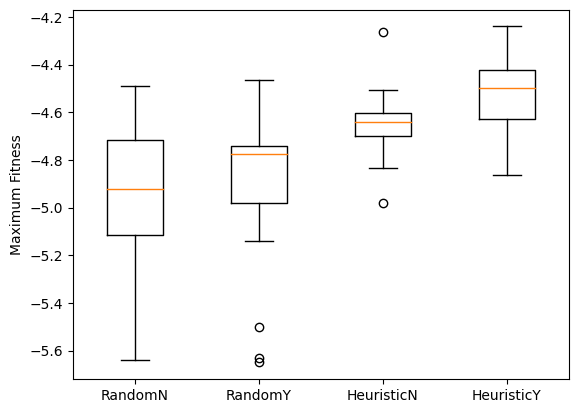

In [11]:
#Plotting the box-plot
fig, ax = plt.subplots()
ax.boxplot([data1, data2, data3, data4])

ax.set_xticklabels(['RandomN', 'RandomY', 'HeuristicN', 'HeuristicY'])
ax.set_ylabel('Maximum Fitness')

plt.savefig('boxplot1.jpg', format='jpg')

In [13]:
data1 = df[(df['Initialisation Type'] == 'Random') & (df['Elitism(Y/N)'] == 'N')]['Time']
data2 = df[(df['Initialisation Type'] == 'Random') & (df['Elitism(Y/N)'] == 'Y')]['Time']
data3 = df[(df['Initialisation Type'] == 'Heuristic') & (df['Elitism(Y/N)'] == 'N')]['Time']
data4 = df[(df['Initialisation Type'] == 'Heuristic') & (df['Elitism(Y/N)'] == 'Y')]['Time']

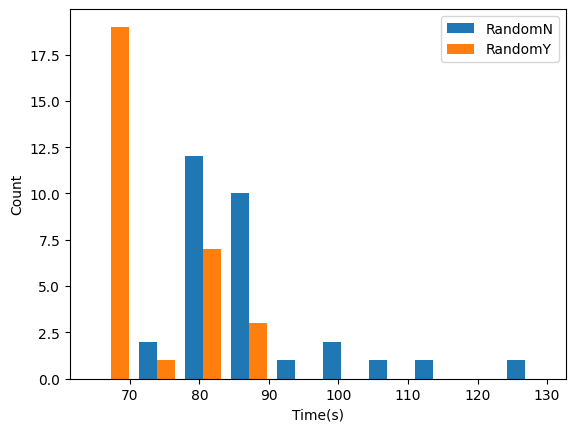

In [23]:
#Plotting the box-plot
fig, ax = plt.subplots()
ax.hist([data1, data2], label=['RandomN', 'RandomY'])

ax.set_xlabel('Time(s)')
ax.set_ylabel('Count')
ax.legend()

plt.savefig('histogram1.jpg', format='jpg')

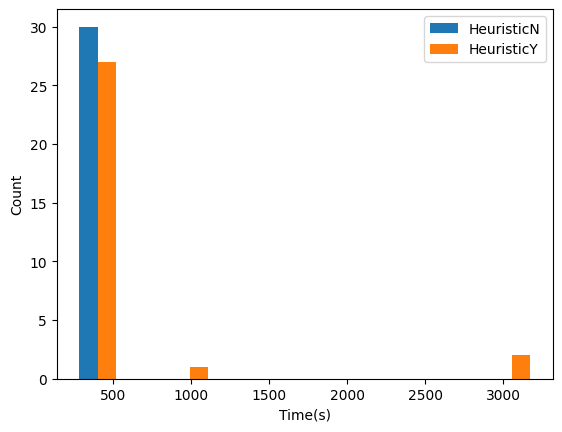

In [24]:
#Plotting the box-plot
fig, ax = plt.subplots()
ax.hist([data3, data4], label=['HeuristicN', 'HeuristicY'])

ax.set_xlabel('Time(s)')
ax.set_ylabel('Count')
ax.legend()

plt.savefig('histogram2.jpg', format='jpg')

In [25]:
df = pd.read_csv('results/Crossover-Mutation.csv')

In [26]:
df

,Crossover Operator,Mutation Operator,Maximum Fitness,Time,Fitness Change per Time
0,OX1,Two_Opt_Swap,-5.320,110.886059,0.028408
1,OX1,Two_Opt_Swap,-5.040,110.520432,0.031533
2,OX1,Two_Opt_Swap,-5.390,107.648233,0.031073
3,OX1,Two_Opt_Swap,-4.465,107.973416,0.032138
4,OX1,Two_Opt_Swap,-4.820,112.294837,0.040919
...,...,...,...,...,...
175,OXC,Two_Opt_Flip,-4.625,89.532722,0.048977
176,OXC,Two_Opt_Flip,-4.410,83.626768,0.054289
177,OXC,Two_Opt_Flip,-4.790,95.321822,0.042697
178,OXC,Two_Opt_Flip,-4.265,81.966325,0.050692


In [40]:
data1 = df[(df['Crossover Operator'] == 'OX1') & (df['Mutation Operator'] == 'Two_Opt_Swap')]['Maximum Fitness']
data2 = df[(df['Crossover Operator'] == 'OX1') & (df['Mutation Operator'] == 'Two_Opt_Flip')]['Maximum Fitness']
data3 = df[(df['Crossover Operator'] == 'OXR') & (df['Mutation Operator'] == 'Two_Opt_Swap')]['Maximum Fitness']
data4 = df[(df['Crossover Operator'] == 'OXR') & (df['Mutation Operator'] == 'Two_Opt_Flip')]['Maximum Fitness']
data5 = df[(df['Crossover Operator'] == 'OXC') & (df['Mutation Operator'] == 'Two_Opt_Swap')]['Maximum Fitness']
data6 = df[(df['Crossover Operator'] == 'OXC') & (df['Mutation Operator'] == 'Two_Opt_Flip')]['Maximum Fitness']

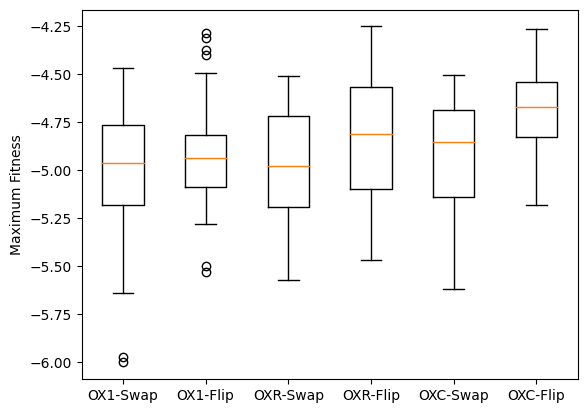

In [41]:
#Plotting the box-plot
fig, ax = plt.subplots()
ax.boxplot([data1, data2, data3, data4, data5, data6])

ax.set_xticklabels(['OX1-Swap', 'OX1-Flip', 'OXR-Swap', 'OXR-Flip', 'OXC-Swap', 'OXC-Flip'])
ax.set_ylabel('Maximum Fitness')

plt.savefig('boxplot2.jpg', format='jpg')

In [33]:
dataA = df[(df['Crossover Operator'] == 'OX1') & (df['Mutation Operator'] == 'Two_Opt_Swap')]['Time']
dataB = df[(df['Crossover Operator'] == 'OX1') & (df['Mutation Operator'] == 'Two_Opt_Flip')]['Time']
dataC = df[(df['Crossover Operator'] == 'OXR') & (df['Mutation Operator'] == 'Two_Opt_Swap')]['Time']
dataD = df[(df['Crossover Operator'] == 'OXR') & (df['Mutation Operator'] == 'Two_Opt_Flip')]['Time']
dataE = df[(df['Crossover Operator'] == 'OXC') & (df['Mutation Operator'] == 'Two_Opt_Swap')]['Time']
dataF = df[(df['Crossover Operator'] == 'OXC') & (df['Mutation Operator'] == 'Two_Opt_Flip')]['Time']

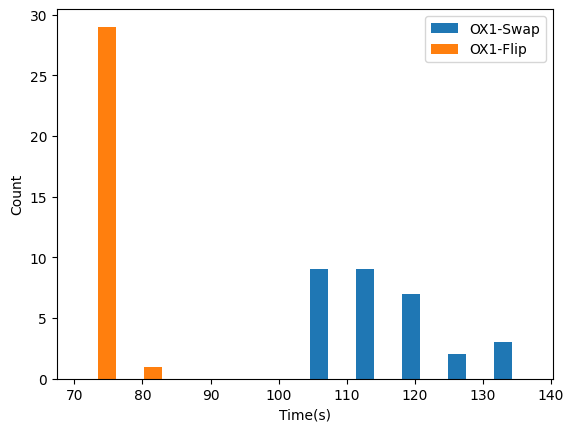

In [40]:
#Plotting the box-plot
fig, ax = plt.subplots()
ax.hist([dataA, dataB], label=['OX1-Swap', 'OX1-Flip'])

ax.set_xlabel('Time(s)')
ax.set_ylabel('Count')
ax.legend()

plt.savefig('histogram3.jpg', format='jpg')

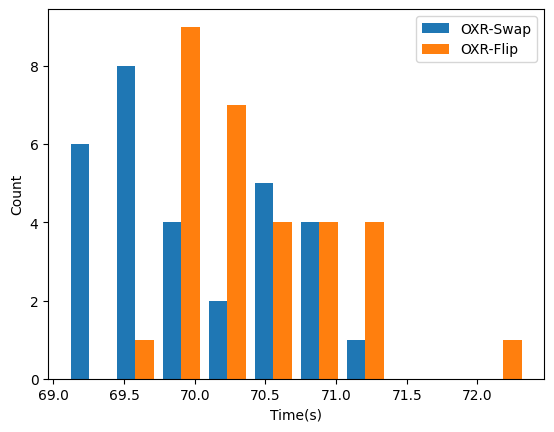

In [43]:
#Plotting the box-plot
fig, ax = plt.subplots()
ax.hist([dataC, dataD], label=['OXR-Swap', 'OXR-Flip'])

ax.set_xlabel('Time(s)')
ax.set_ylabel('Count')
ax.legend()

plt.savefig('histogram4.jpg', format='jpg')

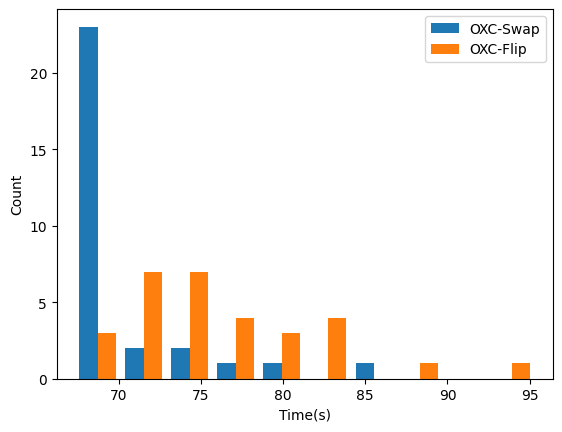

In [44]:
#Plotting the box-plot
fig, ax = plt.subplots()
ax.hist([dataE, dataF], label=['OXC-Swap', 'OXC-Flip'])

ax.set_xlabel('Time(s)')
ax.set_ylabel('Count')
ax.legend()

plt.savefig('histogram5.jpg', format='jpg')